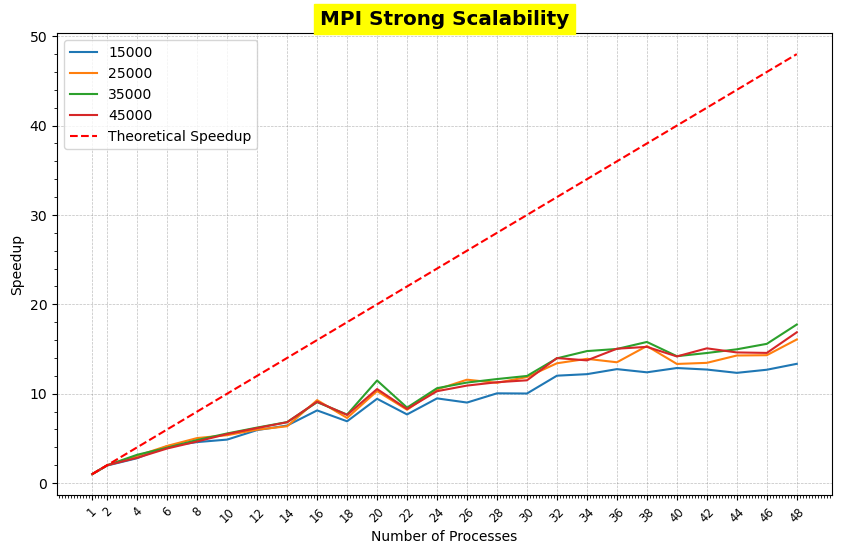

In [1]:
import matplotlib.pyplot as plt
import os

def plot_speedup(filenames, labels, x_index,y_index, ttp=False, speedup=True, title = 'Title', x_label = 'Number of Processes', y_label = 'Speedup', background= 'black', colortitle = 'white',ylim=0):
    """
    Plots speedup data for given files.
    
    Parameters:
    - filenames: A list of filenames containing the data.
    - labels: A list of labels for the plots.
    - x_index: The index to use for the x-axis data.
    - ttp: A boolean indicating whether to plot the theoretical speedup line.
    """
    plt.figure(figsize=(10, 6))  # Initialize the plot

    for idx, filename in enumerate(filenames):
        if os.path.exists(filename):
            with open(filename, 'r') as f:
                data = f.readlines()
                x = [int(line.split(',')[x_index]) for line in data[1:]]  # procs, skip header
                y = [float(line.split(',')[y_index]) for line in data[1:]]  # static_mean, skip header
                if speedup:
                    base = y[0]
                    y = [base / y_i for y_i in y]  # speedup calculation

                # Plot the data
                plt.plot(x, y, label=labels[idx])
        else:
            print(f"File not found: {filename}")

    # Theoretical speedup line (assumes x has been defined; use the last x from loop)
    if ttp and x:
        plt.plot(x, x, label=f'Theoretical Speedup', linestyle='--', color='red')

    if ylim != 0:
        lowest = min(y)
        plt.ylim([lowest-ylim, ylim])

    # Setting plot attributes
    plt.xlabel(f'{x_label}')
    plt.ylabel(f'{y_label}')
    plt.title(f'{title}', fontsize='x-large', fontweight='bold',backgroundcolor=f'{background}',color=f'{colortitle}')
    plt.legend()
    plt.grid(which='major', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
    plt.minorticks_on()
    plt.xticks(ticks=sorted(set(x)), rotation=45, fontsize='small')

    # create the folder
    if not os.path.exists('plots'):
        os.makedirs('plots') 

    # Save the plot
    plt.savefig(f'plots/{title}.png')

    plt.show()  # Show the plot

# Call the function with your files
plot_speedup([
    '../thin/mpi_strong_scalability/15000.csv',
    '../thin/mpi_strong_scalability/25000.csv',
    '../thin/mpi_strong_scalability/35000.csv',
    '../thin/mpi_strong_scalability/45000.csv'
], ['15000', '25000', '35000', '45000'], ttp=True, x_index=1, y_index=2, title='MPI Strong Scalability', x_label='Number of Processes', y_label='Speedup', background='yellow', colortitle='black')

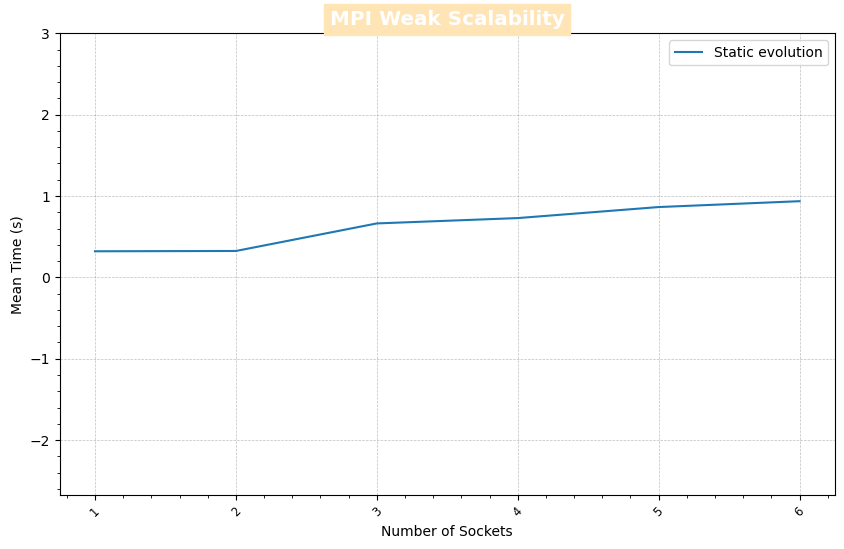

In [2]:
plot_speedup([
    '../thin/mpi_weak_scalability/timing.csv',
], ['Static evolution'],x_index=1, y_index=2, speedup=False, title='MPI Weak Scalability', x_label='Number of Sockets', y_label='Mean Time (s)', background='moccasin', colortitle='white',ylim=3)

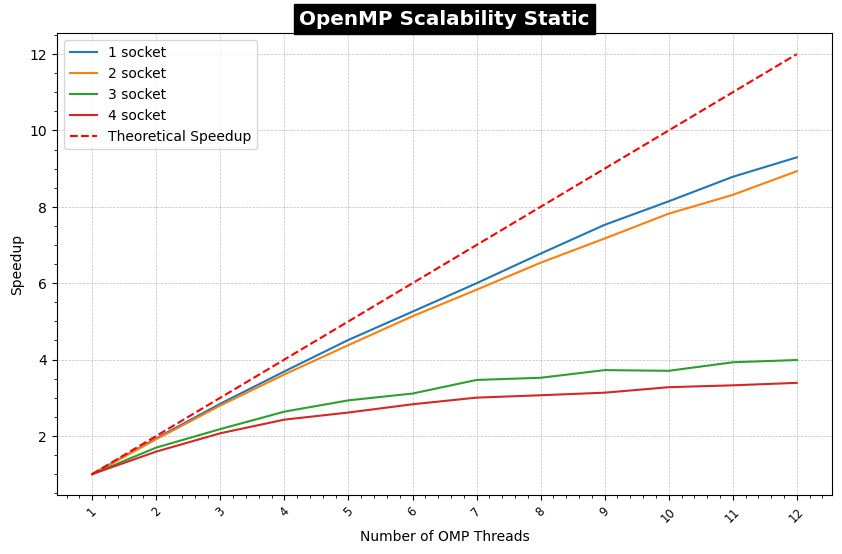

In [3]:
plot_speedup([
    '../thin/omp_scalability/1_sockets.csv',
    '../thin/omp_scalability/2_sockets.csv',
    '../thin/omp_scalability/3_sockets.csv',
    '../thin/omp_scalability/4_sockets.csv'
], ['1 socket', '2 socket', '3 socket', '4 socket'], ttp=True,x_index=0, y_index=1, title='OpenMP Scalability Static', x_label='Number of OMP Threads', y_label='Speedup', background='black', colortitle='white')

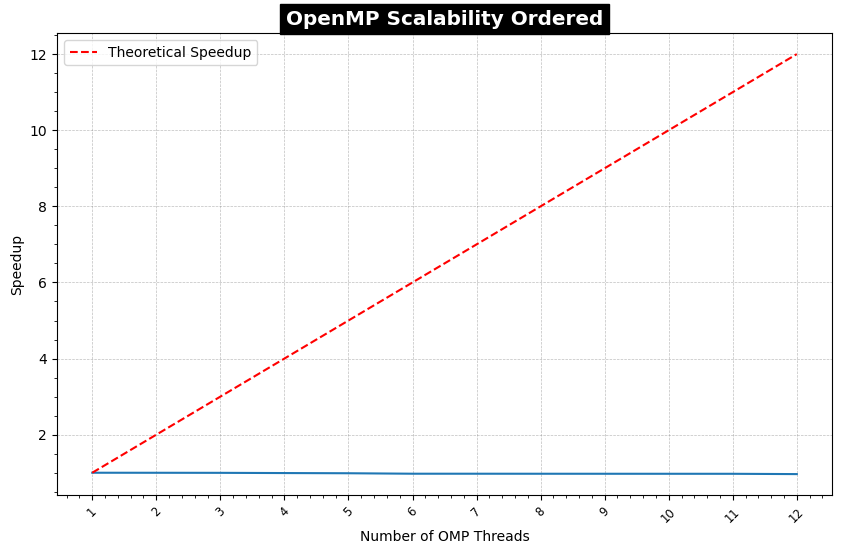

In [4]:
plot_speedup([
    '../thin/ordered_omp_scalability/1_sockets.csv'
], [''], ttp=True,x_index=0, y_index=1, title='OpenMP Scalability Ordered', x_label='Number of OMP Threads', y_label='Speedup', background='black', colortitle='white')